In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore')

In [2]:
Data= pd.read_csv("Company_Data.csv")
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
Data.loc[Data["Sales"] <= 10.00,"Sales1"]="Not High"
Data.loc[Data["Sales"] >= 10.01,"Sales1"]="High"

In [5]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Not High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Not High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Not High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Not High
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Not High
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Not High


In [6]:
data_encode = preprocessing.LabelEncoder() 

In [7]:
Data['Urban']=data_encode.fit_transform(Data['Urban'])
Data['US']=data_encode.fit_transform(Data['US'])
Data['ShelveLoc']=data_encode.fit_transform(Data['ShelveLoc'])
Data["Sales1"] = data_encode.fit_transform(Data["Sales1"])

In [8]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [9]:
x=Data.iloc[:,1:11]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [10]:
y=Data["Sales1"]
y

0      1
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: Sales1, Length: 400, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
336,138,35,6,60,143,0,28,18,1,0
64,100,67,12,184,104,2,32,16,0,1
55,143,81,5,60,154,2,61,18,1,1
106,102,33,0,217,139,2,70,18,0,0
300,116,78,1,158,99,2,45,11,1,1
...,...,...,...,...,...,...,...,...,...,...
323,107,105,18,428,103,2,34,12,1,1
192,108,26,0,408,93,2,56,14,0,0
117,145,53,0,507,119,2,41,12,1,0
47,126,98,0,173,108,0,55,16,1,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
model= DecisionTreeClassifier(criterion='entropy' , max_depth = 5 )
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
import matplotlib.pyplot as plt

[Text(429.8108108108108, 996.6, 'X[4] <= 94.5\nentropy = 0.696\nsamples = 320\nvalue = [60, 260]'),
 Text(135.72972972972974, 815.4000000000001, 'X[5] <= 0.5\nentropy = 0.996\nsamples = 56\nvalue = [26, 30]'),
 Text(60.32432432432432, 634.2, 'X[6] <= 29.0\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(30.16216216216216, 453.0, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(90.48648648648648, 453.0, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(211.13513513513513, 634.2, 'X[6] <= 55.0\nentropy = 0.974\nsamples = 42\nvalue = [25, 17]'),
 Text(150.8108108108108, 453.0, 'X[0] <= 120.5\nentropy = 0.667\nsamples = 23\nvalue = [19, 4]'),
 Text(120.64864864864865, 271.79999999999995, 'X[5] <= 1.5\nentropy = 0.89\nsamples = 13\nvalue = [9, 4]'),
 Text(90.48648648648648, 90.59999999999991, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(150.8108108108108, 90.59999999999991, 'entropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(180.97297297297297, 271.79999999999995, 

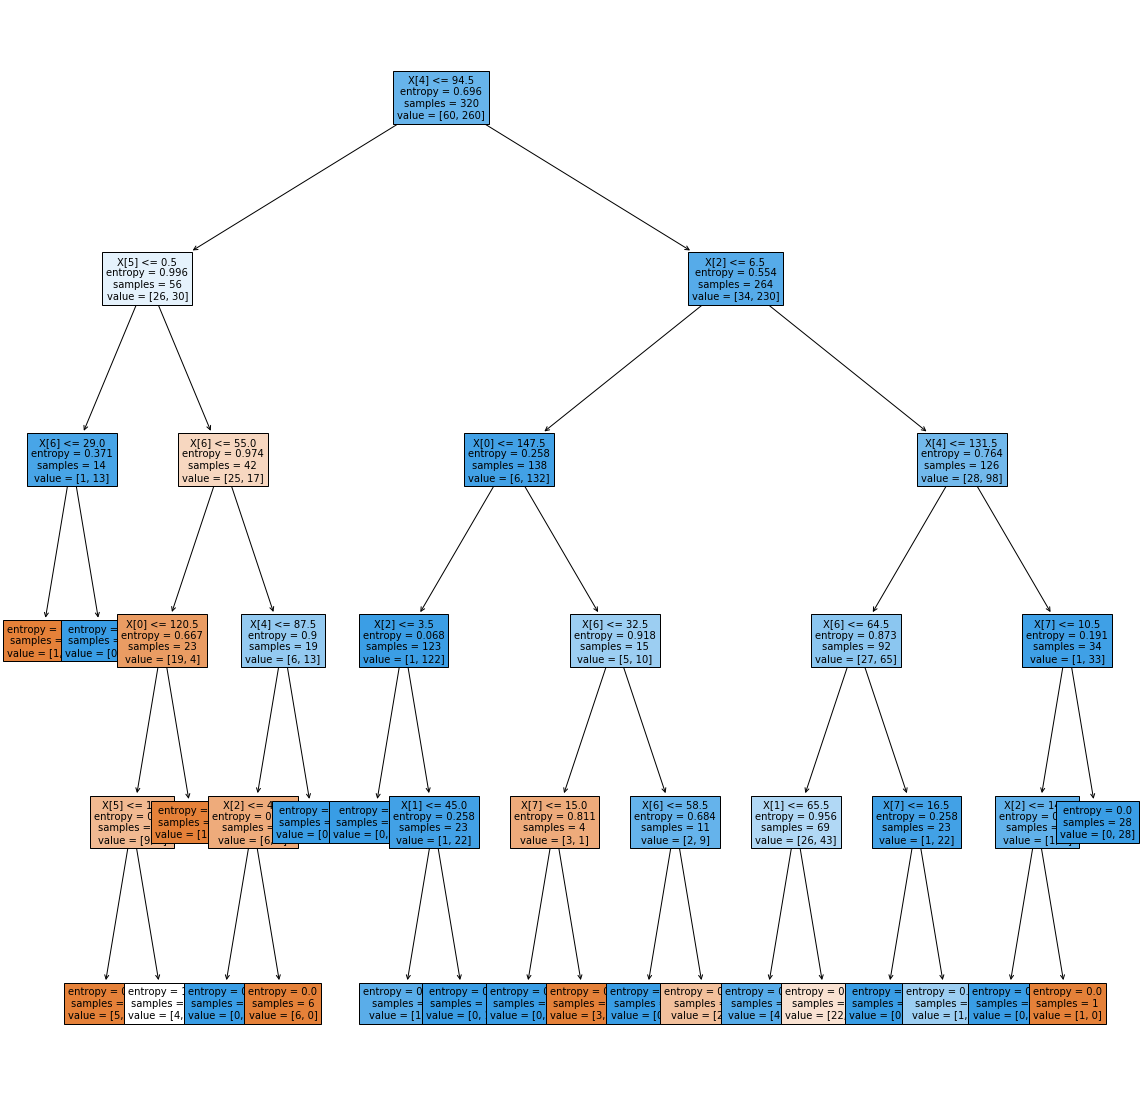

In [16]:
plt.figure(figsize=(20 , 20 ))
tree.plot_tree(model , fontsize= 10 , filled=True)

In [17]:
y_pred=model.predict(x_test)
pd.Series(y_pred).value_counts()

1    62
0    18
dtype: int64

In [18]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Sales1,,
0,9,9
1,9,53


In [19]:
accuracy_score(y_pred , y_test)

0.775

In [20]:
cm = confusion_matrix(y_pred , y_test)
cm

array([[ 9,  9],
       [ 9, 53]], dtype=int64)

In [21]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Not High Sales', 'High Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=600)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);


# Using Gini Index

In [22]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
y_gini_pred= model_gini.predict(x_test)

In [24]:
accuracy_score(y_gini_pred , y_test)

0.775

In [25]:
pd.crosstab(y_gini_pred,y_test)

Sales1,0,1
row_0,,
0,3,3
1,15,59


# Bagging 

In [26]:
from sklearn.model_selection import KFold , cross_val_score
kfold=KFold(n_splits=10)

In [31]:
from sklearn.ensemble import BaggingClassifier 
cart=DecisionTreeClassifier(criterion='entropy')
bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10,random_state=7)
# using Full data set
bag_results= cross_val_score(bagging_model,x,y,cv=kfold)

# using split data set
bag_results_1 = cross_val_score(bagging_model,x_train ,y_train,cv=kfold)

bag_results

array([0.85 , 0.825, 0.875, 0.75 , 0.9  , 0.925, 0.95 , 0.8  , 0.8  ,
       0.875])

In [29]:
print(bag_results.mean())

0.8550000000000001


In [32]:
print(bag_results_1.mean())

0.84375
